In [1]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("data_sales.db")
cursor = conn.cursor()

# Create the 'sales' table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL,
        sale_date TEXT
    )
''')

# Sample data
sample_data = [
    ('Coffee', 10, 5.0, '2024-01-01'),
    ('Tea', 8, 3.5, '2024-01-02'),
    ('Coffee', 5, 5.0, '2024-01-03'),
    ('Juice', 7, 4.0, '2024-01-04'),
    ('Sandwich', 6, 6.5, '2024-01-05'),
    ('Coffee', 9, 5.0, '2024-01-06'),
    ('Tea', 4, 3.5, '2024-01-07'),
    ('Juice', 10, 4.0, '2024-01-08'),
    ('Cold Coffee', 12, 6.0, '2024-01-09'),
    ('Waffle', 3, 7.5, '2024-01-10'),
    ('Sandwich', 5, 6.5, '2024-01-11'),
    ('Cold Coffee', 7, 6.0, '2024-01-12'),
    ('Waffle', 6, 7.5, '2024-01-13'),
    ('Tea', 10, 3.5, '2024-01-14'),
    ('Coffee', 8, 5.0, '2024-01-15')
]

# Insert the sample data
cursor.executemany('''
    INSERT INTO sales (product, quantity, price, sale_date) 
    VALUES (?, ?, ?, ?)
''', sample_data)

# Commit changes
conn.commit()

print("Dummy data inserted successfully!")


Dummy data inserted successfully!


In [2]:
# SQL query to get the product wise revenue

query = "SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue FROM sales GROUP BY product"

In [3]:
#Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Load the data fetched from SQL query into pandas

df = pd.read_sql_query(query, conn)

In [5]:
# Print the data

print(df)

       product  total_qty  revenue
0       Coffee         32    160.0
1  Cold Coffee         19    114.0
2        Juice         17     68.0
3     Sandwich         11     71.5
4          Tea         22     77.0
5       Waffle          9     67.5


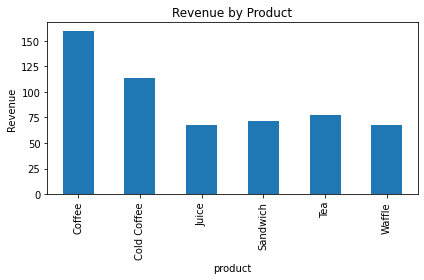

In [6]:
#Plotting the bar graph of Revenue by Product.

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()

# Saving the graph generated.
plt.savefig("sales_chart.png", facecolor="White")
plt.show()         